In [67]:
import pandas as pd
import numpy as np

In [68]:
col_names = ["code-number", "clump", "cell-size", "cell-shape",
                "marginal-adhesion", "epithelial-cell-size", "bare-nuclei",
                "bland-chromatin", "normal-nucleoli", "mitoses", "class"]

In [69]:
df_raw = pd.read_csv("BreastCancerWc.csv", names=col_names, na_values="?", sep=",")
df_raw

,code-number,clump,cell-size,cell-shape,marginal-adhesion,epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


### Data cleaning(Remove NA, ?, Negative values etc.)

In [70]:
df_raw.isna().sum()

code-number              0
clump                    0
cell-size                0
cell-shape               0
marginal-adhesion        0
epithelial-cell-size     0
bare-nuclei             16
bland-chromatin          0
normal-nucleoli          0
mitoses                  0
class                    0
dtype: int64

In [71]:
df_raw['bare-nuclei'].unique()


array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [72]:
# df_raw['bare-nuclei'] = df_raw.fillna(df_raw['bare-nuclei'].mean(), inplace=True)
df_raw['bare-nuclei'].fillna(df_raw['bare-nuclei'].mean(), inplace=True)

In [73]:
df_raw.isna().sum()

code-number             0
clump                   0
cell-size               0
cell-shape              0
marginal-adhesion       0
epithelial-cell-size    0
bare-nuclei             0
bland-chromatin         0
normal-nucleoli         0
mitoses                 0
class                   0
dtype: int64

In [74]:
for col in df_raw.select_dtypes(include=["float64","int64"]).columns:
    print(df_raw[df_raw[col] < 0].count())
# no negative values

code-number             0
clump                   0
cell-size               0
cell-shape              0
marginal-adhesion       0
epithelial-cell-size    0
bare-nuclei             0
bland-chromatin         0
normal-nucleoli         0
mitoses                 0
class                   0
dtype: int64
code-number             0
clump                   0
cell-size               0
cell-shape              0
marginal-adhesion       0
epithelial-cell-size    0
bare-nuclei             0
bland-chromatin         0
normal-nucleoli         0
mitoses                 0
class                   0
dtype: int64
code-number             0
clump                   0
cell-size               0
cell-shape              0
marginal-adhesion       0
epithelial-cell-size    0
bare-nuclei             0
bland-chromatin         0
normal-nucleoli         0
mitoses                 0
class                   0
dtype: int64
code-number             0
clump                   0
cell-size               0
cell-shape              0

### Error correcting(Outlier detection and removal)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

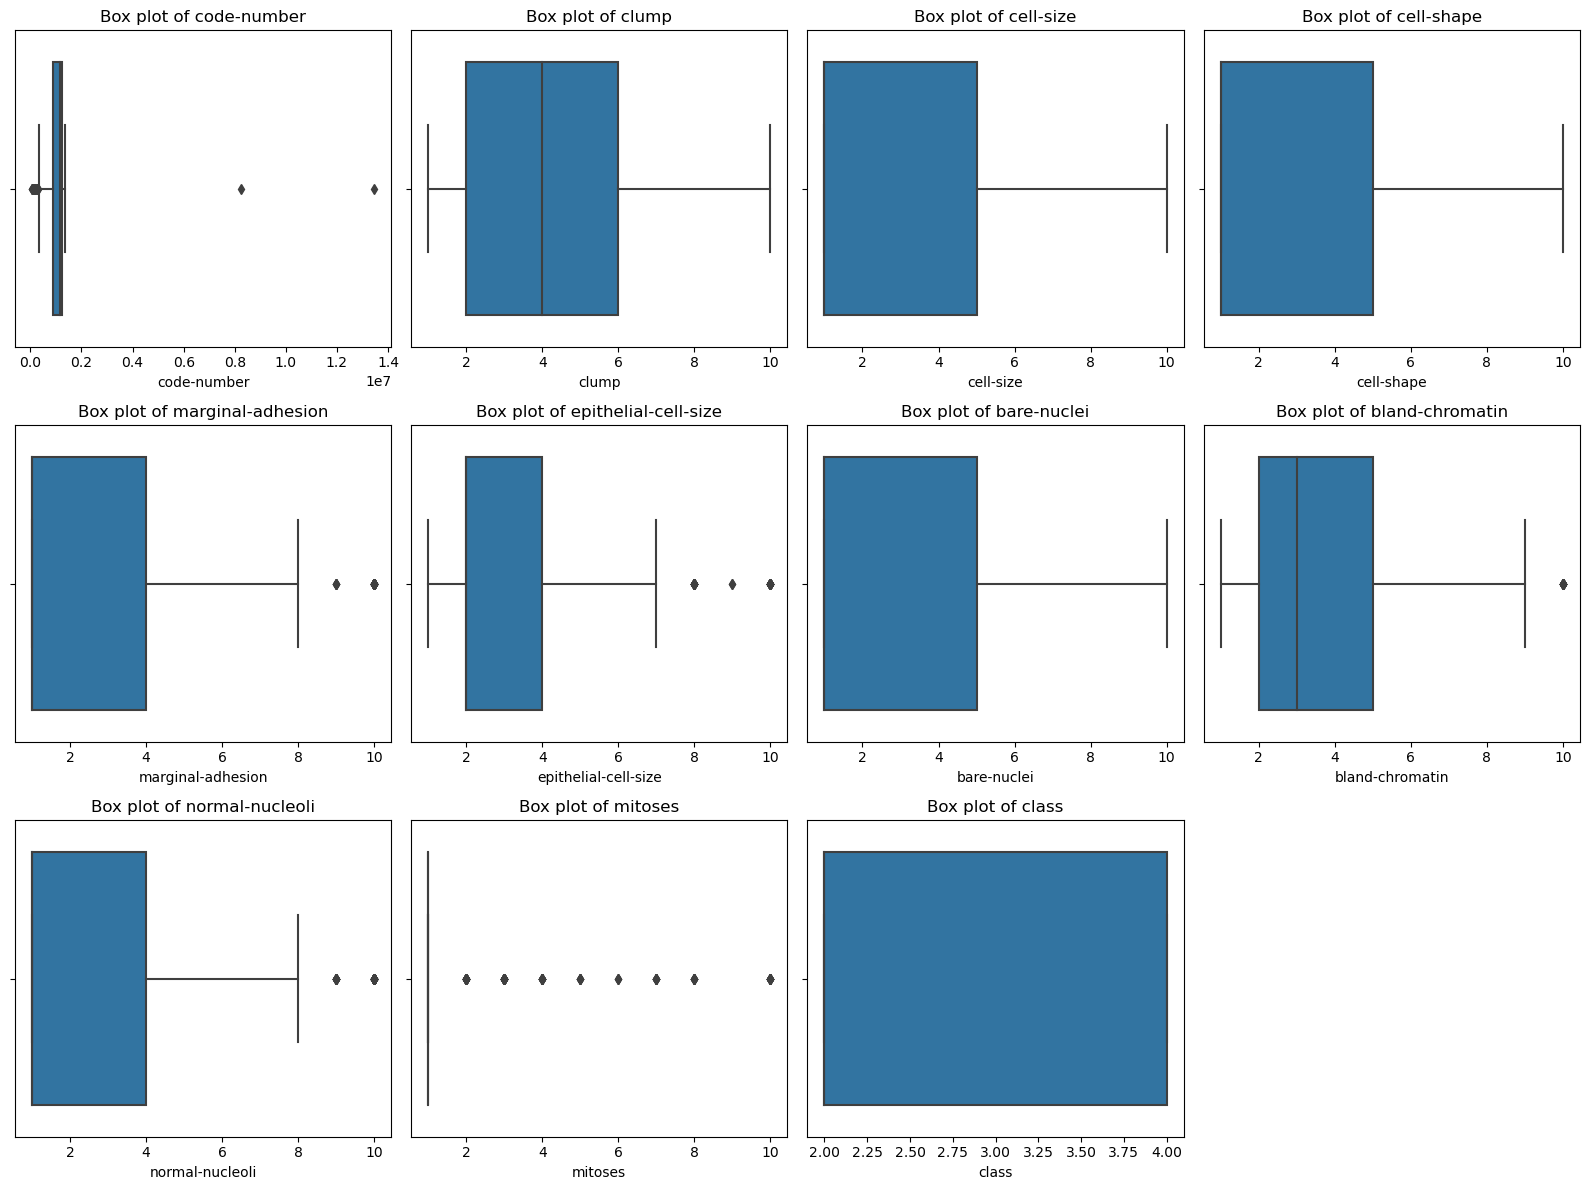

In [76]:
def vis_outliers(df):
    n = len(df.select_dtypes(include=["float64", "int64"]).columns)
    row = ((n+3)//4)
    col = min(n, 4)

    fig, axes = plt.subplots(row, col, figsize=(16, 4*row))

    axes = axes.flatten()

    for i, col in enumerate(df.select_dtypes(include=["float64", "int64"]).columns):
        sns.boxplot(ax=axes[i], x=df[col])
        axes[i].set_title(f'Box plot of {col}')
        axes[i].set_xlabel(col)
    
    # hide unwanted plots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

vis_outliers(df_raw)
    

In [77]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.7 * IQR
    upper_bound = Q3 + 1.7 * IQR

    lst = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

    return lst

In [78]:
df_raw.columns.unique()

Index(['code-number', 'clump', 'cell-size', 'cell-shape', 'marginal-adhesion',
       'epithelial-cell-size', 'bare-nuclei', 'bland-chromatin',
       'normal-nucleoli', 'mitoses', 'class'],
      dtype='object')

In [79]:
index_list = []
# for i, col in enumerate(df_raw.columns):
#     index_list.extend(outliers(df_raw, col))
index_list.extend(outliers(df_raw, 'marginal-adhesion'))
# index_list.extend(outliers(df_raw, 'code-number'))
# index_list.extend(outliers(df_raw, 'normal-nucleoli'))
index_list.extend(outliers(df_raw, 'epithelial-cell-size'))
# index_list.extend(outliers(df_raw, 'bland-chromatin'))

In [80]:
def remove(df, lst):
    lst = sorted(set(lst))
    df = df.drop(lst)
    return df
df3 = remove(df=df_raw, lst=index_list)

In [81]:
print(df_raw.shape)
print(df3.shape)


(699, 11)
(605, 11)


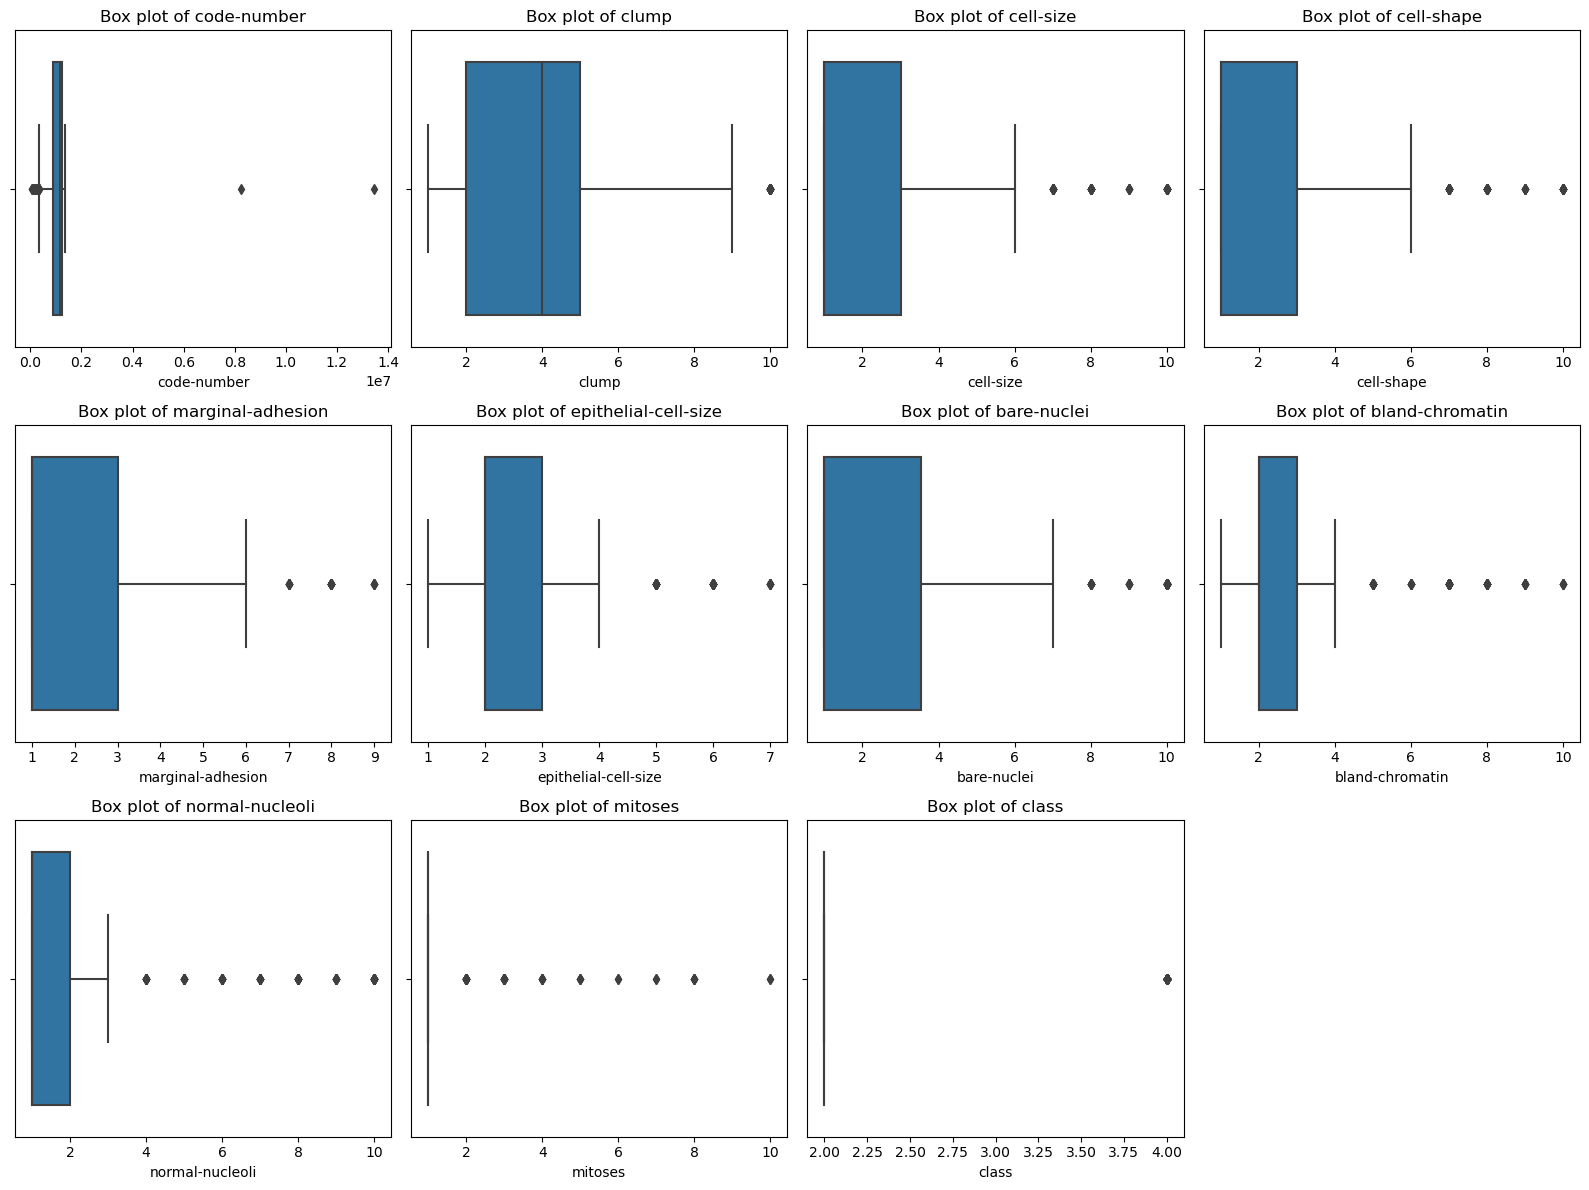

In [82]:
vis_outliers(df3)

In [83]:
def remove_outliers(data, threshold=3):
    zscore = (data-data.mean())/data.std()
    out = zscore > 3
    data = data[~out.any(axis=1)]
    return data
df_cleaned = remove_outliers(df_raw)

In [84]:
print(df_raw.shape)
print(df_cleaned.shape)

(699, 11)
(646, 11)


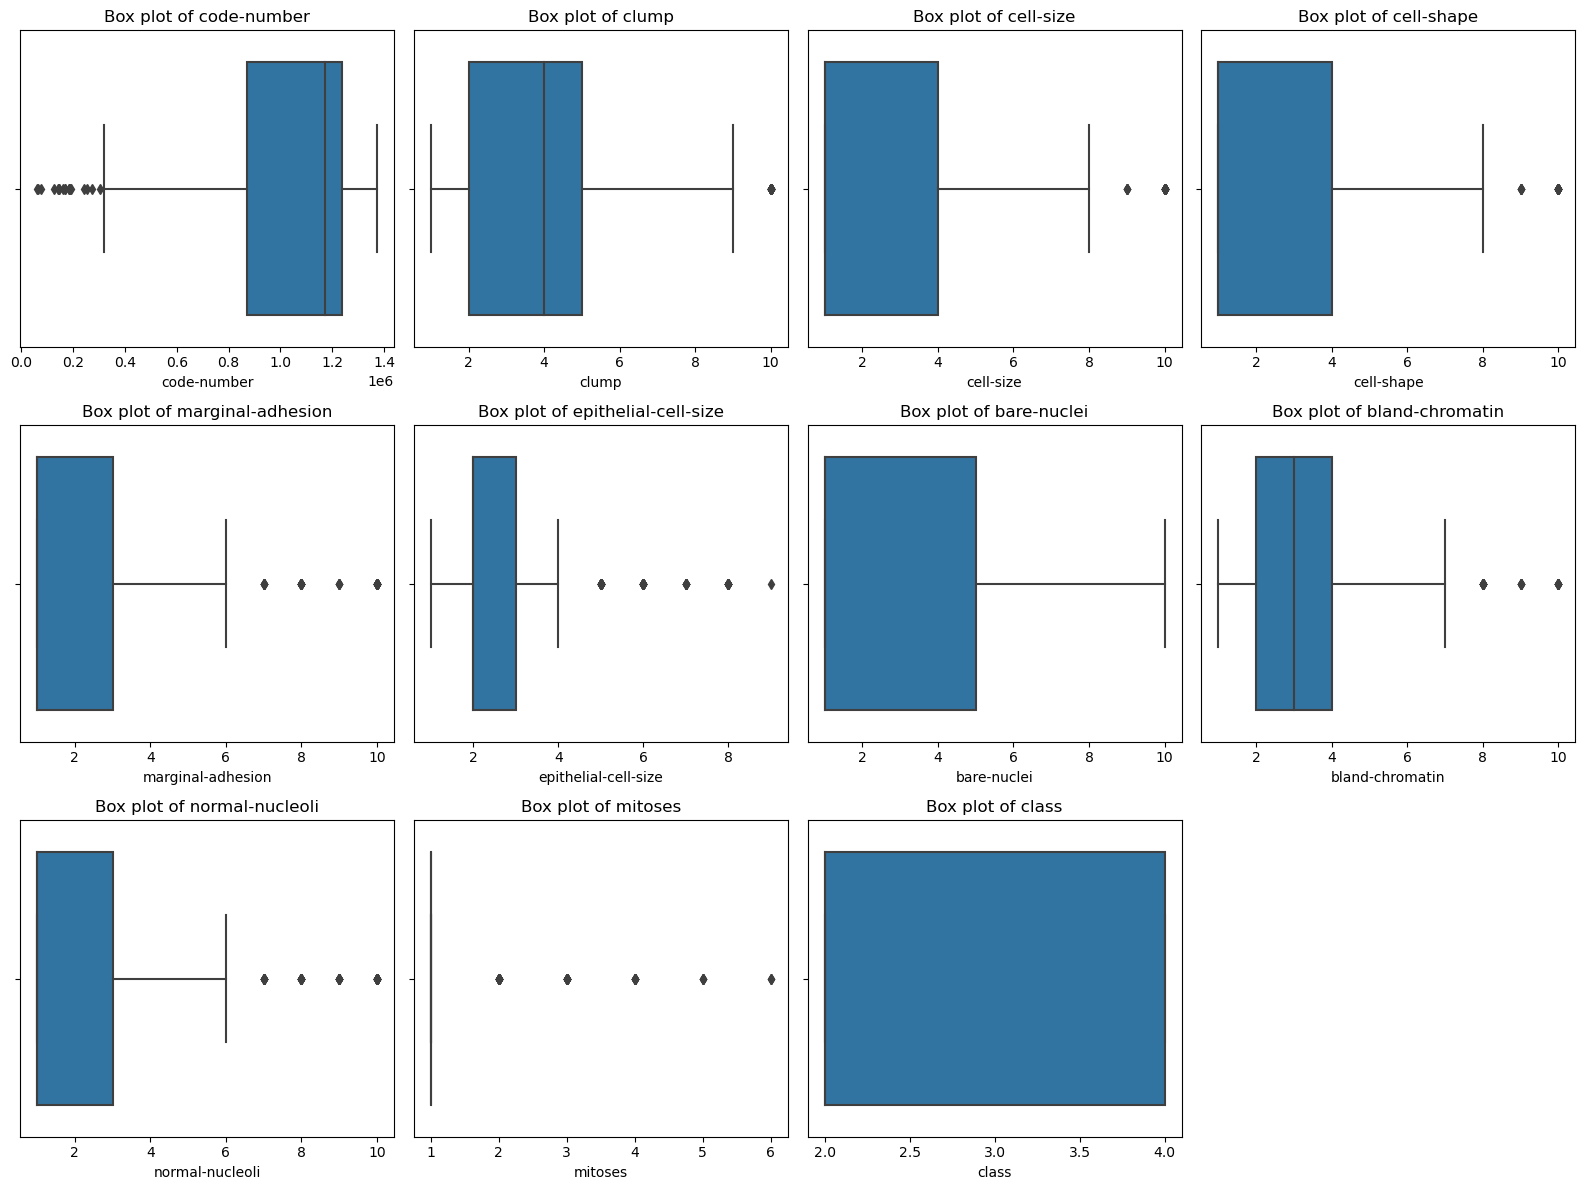

In [85]:
vis_outliers(df_cleaned)

### c. Data transformation

1. One-Hot Encoding:
    - One-hot encoding is used to convert categorical variables into a binary matrix, where each category becomes a separate binary feature.
    - Each category is represented by a binary column, where a value of 1 indicates the presence of the category and 0 indicates absence.
    - This technique is useful when there is no ordinal relationship between categories.
2. Label Encoding:
    - Label encoding is used to convert categorical variables into numerical labels.
    - Each category is assigned a unique integer value.
    - This technique is suitable when there is an ordinal relationship between categories.

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [87]:
le = LabelEncoder()
le.fit(df_raw['class'])
le.classes_

array([2, 4], dtype=int64)

In [88]:
df_raw['class'] = le.transform(df_raw['class'])

In [89]:
df_raw['class']

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

### Build Data model using regression and Naïve Bayes methods and compare accuracy

<AxesSubplot:>

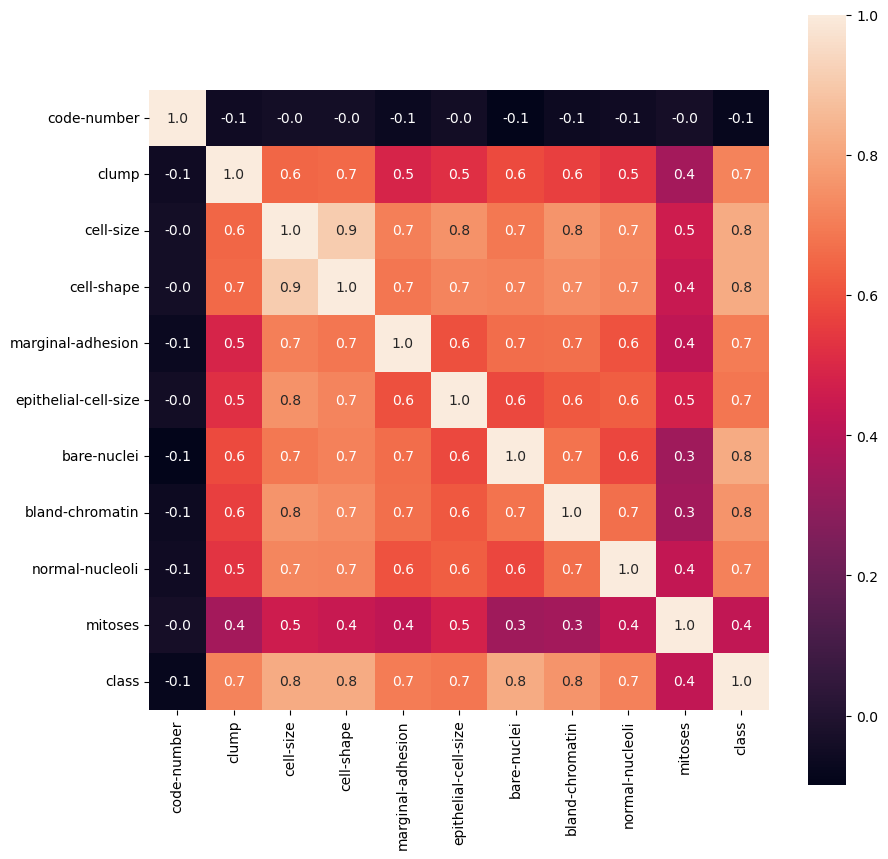

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_raw.corr(),cbar=True,square=True,fmt='.1f',annot=True)

In [91]:
attributes = df_raw[['clump', 'cell-size', 'cell-shape', 'marginal-adhesion', 
                     'bare-nuclei', 'bland-chromatin', 'normal-nucleoli']]

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [93]:
X = df_cleaned.drop('class', axis=1) 
Y = df_cleaned['class']
# X = df_raw.drop('class', axis=1) 
# Y = df_raw['class']

In [94]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [95]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression()

In [96]:
y_pred = lr.predict(test_x)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [97]:
acc = accuracy_score(test_y, y_pred=y_pred)
acc

0.6958762886597938

In [98]:
nb = GaussianNB()
nb.fit(train_x, train_y)

GaussianNB()

In [99]:
nb_y_pred = nb.predict(test_x)

In [100]:
print("Accuracy of NavieBayes: ",accuracy_score(test_y,nb_y_pred))

Accuracy of NavieBayes:  0.7835051546391752
